# 

# **Análisis Descriptivo Items MLA**

****

## Ticket link: SEDMLD-25
This is [Jira Task](https://mercadolibre.atlassian.net/browse/SEDMLD-21?atlOrigin=eyJpIjoiZmFkZDJiNmRjZGUwNDhlZmFmODY1ZTE4YjI2NTE2OTYiLCJwIjoiaiJ9).

## Ticket link: SEDMLD-26
This is [Jira Task](https://mercadolibre.atlassian.net/browse/SEDMLD-26?atlOrigin=eyJpIjoiMmIzYjRhMGQzNjZjNDg3NDg0ZGIyNzc3NWFiN2ZiOTMiLCJwIjoiaiJ9).

### Por: Esteban Martinez R

### Fecha: 2023-05-19

****

<a id="0"></a> <br>
 # Table of Contents  
1. [Descripción](#1)     
    1. [librerias](#7) 
1. [Carga de datos dataset ids](#2) 
1. [Procesamiento de datos dataset ids](#3) 
     1. [Transformación lista a diccionarios](#7)
     1. [Transformación diccionarios a dataframe](#7)
     1. [Revisión de missing values](#7)
     1. [Casteos y creación nuevas variables](#7)
1. [Resultado y conclusiones de los datos dataset ids](#4)     
    1. [Análisis de variables](#5) 
    1. [Comentarios](#5)
1. [Resultados y conclusiones de la estructura del dataset ids](#6)    
    1. [Supuestos iniciales](#5) 
    1. [Análisis de variables](#5) 
    1. [Comentarios](#5)
1. [Carga de datos dataset product](#2) 
1. [Procesamiento de datos dataset product](#3) 
     1. [Transformación lista a diccionarios](#7)
     1. [Transformación diccionarios a dataframe](#7)
     1. [Revisión de missing values](#7)
     1. [Casteos y creación nuevas variables](#7)
1. [Resultados y conclusiones de la estructura del dataset product](#6)    
    1. [Análisis de variables](#5) 
    1. [Comentarios](#5)      
1. [Propuestas e ideas generales](#8)     


****

## **1. Descripción:**

Se realizó una revisión de los datos correpondientes a items MLA que consisten en dos dataset. El primero, $ids$ que contiene una lista de items con una cantidad importante de variables, que se pueden separar en identificadores y características. El segundo, $product$ que presenta una lista de productos con variables divididas en identificadores y  características. El proposito de estar revisión es entender la estructura de los dataset, es decir, entender las jerarquias de las variables, y las relaciones más frecuentes, para con esto, ir desifrando la relación entre las variables.

### **A.Librerias**

In [211]:
# Herramienta para cargar librerias de MeLi permite direcciar las librerias por los ambientes: test, producción
#!poetry add seaborn
#!pip install nltk
#!pip install wordcloud

#!gunzip compressed_products_ids.txt.gz
#!gunzip compressed_ids.txt.gz

In [1]:
# Basicas
import pandas as pd
# Graph
import seaborn as sns
import matplotlib.pyplot as plt
# carga de datos
import gzip
from api_utils.extract.from_api import get_products_from_api, get_items_from_api
# Tiempo fechas
from datetime import datetime
# NLP y Analisis de texto
#import nltk
#from wordcloud import WordCloud
#from wordcloud import ImageColorGenerator
#from wordcloud import STOPWORDS
#nltk.download('stopwords')

## **2. Carga de datos**

In [2]:
with gzip.open('compressed_ids.txt.gz') as f:
    ids_df = pd.read_csv(f, names=['id'])
ids_df.head()

,id
0,MLA1100002016
1,MLA1100002043
2,MLA1100002044
3,MLA1100002047
4,MLA1100002071


In [93]:
#import pandas as pd
#ids_df = pd.read_csv('compressed_ids.txt', names=['id'])

In [183]:
# Revisiones básicas
ids_df.head()

,id
0,MLA1100002016
1,MLA1100002043
2,MLA1100002044
3,MLA1100002047
4,MLA1100002071


In [3]:
# Api request
items_test = ids_df.sample(5000).id.tolist()

In [4]:
# Revisiones básicas
items_test[6:9]

['MLA773187390', 'MLA734132405', 'MLA1355292250']

In [5]:
# Creación de lista de items
items_metadata = list(get_items_from_api(items_test))

Retrieving 5000 items from API


In [6]:
# Revisiones básicas
items_metadata[2]

('MLA734132405',
 {'id': 'MLA734132405',
  'site_id': 'MLA',
  'title': 'Blaze And The Monster Machine Turbo C/lanzador -fisher Price',
  'subtitle': None,
  'seller_id': 128411524,
  'category_id': 'MLA37616',
  'user_product_id': None,
  'official_store_id': 256,
  'price': 14990,
  'base_price': 14990,
  'original_price': None,
  'currency_id': 'ARS',
  'initial_quantity': 224,
  'available_quantity': 100,
  'sold_quantity': 124,
  'sale_terms': [],
  'buying_mode': 'buy_it_now',
  'listing_type_id': 'gold_special',
  'start_time': '2018-06-27T20:01:23.000Z',
  'historical_start_time': '2018-06-27T20:01:23.000Z',
  'stop_time': '2038-06-22T04:00:00.000Z',
  'condition': 'new',
  'permalink': 'https://articulo.mercadolibre.com.ar/MLA-734132405-blaze-and-the-monster-machine-turbo-clanzador-fisher-price-_JM',
  'thumbnail_id': '994272-MLA31115446650_062019',
  'thumbnail': 'http://http2.mlstatic.com/D_994272-MLA31115446650_062019-I.jpg',
  'secure_thumbnail': 'https://http2.mlstatic.co

## **3. Procesamiento de datos**

### **A. Transformación de lista a diccionario**

In [7]:
my_list = dict(items_metadata)
#print(my_list)

### **B. Transformación de diccionario a dataframes**

In [8]:


dff= pd.DataFrame.from_dict(my_list)
df = dff.T
df.head(10)


,id,site_id,title,subtitle,seller_id,category_id,user_product_id,official_store_id,price,base_price,...,differential_pricing,deal_ids,automatic_relist,date_created,last_updated,total_listing_fee,health,catalog_listing,channels,bundle
MLA1207406721,MLA1207406721,MLA,"Casa Tipo Chalet De 3 Amb. , Encontra Tu Paz Y...",None,388788742,MLA50278,None,None,1500,1500,...,None,[],False,2022-10-21T22:31:54.000Z,2023-05-10T00:28:51.000Z,None,0.4,False,[marketplace],None
MLA934288344,MLA934288344,MLA,Sandalias De Cuero Genuino Keys,None,46869844,MLA416005,None,None,18000,18000,...,None,[],False,2021-08-13T23:53:33.000Z,2023-01-07T00:40:40.207Z,None,0.77,False,[marketplace],None
MLA734132405,MLA734132405,MLA,Blaze And The Monster Machine Turbo C/lanzador...,None,128411524,MLA37616,None,256,14990,14990,...,None,[],False,2018-06-27T20:01:24.000Z,2023-05-16T14:39:38.873Z,None,0.7,False,"[marketplace, mshops]",None
MLA875443792,MLA875443792,MLA,Funda Doble Capa Celular Para Motorola Moto E6...,None,30468831,MLA5337,None,None,1990,1990,...,None,[],False,2020-08-27T21:57:00.000Z,2023-05-24T14:00:26.000Z,None,0.77,False,"[marketplace, mshops]",None
MLA1355292250,MLA1355292250,MLA,Amortiguador Peugeot 307 408 3008 408 C4 Trasero,None,261713408,MLA45548,None,None,14970,14970,...,None,[MLA6015],False,2023-02-23T14:30:30.000Z,2023-05-24T18:24:23.262Z,None,0.75,False,[marketplace],None
MLA900379466,MLA900379466,MLA,Moldes Reposteria Cinturas Aros Cuadrado Perfo...,None,262835699,MLA30096,None,None,1280.88,1280.88,...,None,[MLA31182],False,2020-12-09T15:22:38.000Z,2023-05-22T03:42:14.583Z,None,0.88,False,"[marketplace, mshops]",None
MLA741285134,MLA741285134,MLA,Cuenco Chico - Bowl - Ceramica,None,252852918,MLA74543,None,None,2100,2100,...,None,[],False,2018-08-05T19:57:20.000Z,2023-05-16T04:38:12.827Z,None,0.87,False,[marketplace],None
MLA1379200670,MLA1379200670,MLA,Jaguar Xe Xe 25t Se,None,84419415,MLA1744,None,None,87000,87000,...,None,[],False,2023-03-24T16:05:25.000Z,2023-04-23T04:05:44.000Z,None,None,False,[marketplace],None
MLA1266627487,MLA1266627487,MLA,"Ruedas Nisi, Mazas Campagnolo Record.",None,126835305,MLA371623,None,None,67000,67000,...,None,[],False,2022-12-01T17:43:01.000Z,2023-04-17T01:27:44.000Z,None,0.87,False,[marketplace],None
MLA857251327,MLA857251327,MLA,Buzo Salomon Polar Lt Hombre Black,None,60966203,MLA109085,None,None,24999,24999,...,None,[],False,2020-05-22T18:33:15.000Z,2023-04-27T03:50:01.000Z,None,0.81,False,[marketplace],None


In [9]:
# Revisiones básicas
check1 = df.describe()
check1


,id,site_id,title,subtitle,seller_id,category_id,user_product_id,official_store_id,price,base_price,...,differential_pricing,deal_ids,automatic_relist,date_created,last_updated,total_listing_fee,health,catalog_listing,channels,bundle
count,5000,5000,5000,0,5000,5000,0,237,4941,4941,...,0,4945,4945,5000,5000,28,4687.00,4945,4945,0
unique,5000,1,4997,0,4298,1753,0,170,3065,3065,...,0,119,1,4999,4990,14,29.00,2,3,0
top,MLA1207406721,MLA,Camisa Rapsodia,NaN,161008662,MLA412445,NaN,1794,2500,2500,...,NaN,[],False,2022-06-07T22:15:20.000Z,2023-05-24T17:21:07.000Z,9900,0.77,False,"[marketplace, mshops]",NaN
freq,1,5000,2,NaN,38,327,NaN,6,40,40,...,NaN,4531,4945,2,2,6,470.00,4706,2834,NaN


In [197]:
# Revisiones básicas
df.dtypes

id                                          object
site_id                                     object
title                                       object
subtitle                                    object
seller_id                                   object
category_id                                 object
user_product_id                             object
official_store_id                           object
price                                      float64
base_price                                 float64
original_price                              object
currency_id                                 object
initial_quantity                           float64
available_quantity                         float64
sold_quantity                              float64
sale_terms                                  object
buying_mode                                 object
listing_type_id                             object
start_time                                  object
historical_start_time          

In [193]:
# Revisones básicas
df.shape

(5000, 58)

### **C. Revisiones de missing values**

In [194]:

def missing(dt):
    dat_missing = dt.isnull().sum()
    return dat_missing

missing(df)

id                                     0
site_id                                0
title                                  0
subtitle                            5000
seller_id                              0
category_id                            0
user_product_id                     5000
official_store_id                   4729
price                                 68
base_price                            68
original_price                      4802
currency_id                           68
initial_quantity                      63
available_quantity                    63
sold_quantity                         63
sale_terms                            63
buying_mode                           63
listing_type_id                        0
start_time                             0
historical_start_time                 63
stop_time                             63
condition                             68
permalink                             63
thumbnail_id                          63
thumbnail       

### **D. Revisiones básicas casteo de datos**

In [195]:

def casteos(dt):
    
    dt['parent_item_id'] = dt['parent_item_id'].astype('string')
    dt['catalog_product_id'] = dt['catalog_product_id'].astype('string')
    dt['price'] = pd.to_numeric(dt['price'], errors='coerce')
    dt['base_price'] = pd.to_numeric(dt['base_price'], errors='coerce')
    dt['initial_quantity'] = pd.to_numeric(dt['initial_quantity'], errors='coerce')
    dt['available_quantity'] = pd.to_numeric(dt['available_quantity'], errors='coerce')
    dt['sold_quantity'] = pd.to_numeric(dt['sold_quantity'], errors='coerce')
    dt['date_created'] =  dt['date_created'].map(lambda x: datetime.strptime(str(x), "%Y-%m-%dT%H:%M:%S.%fZ"))
    dt['last_updated'] = dt['last_updated'].map(lambda x: datetime.strptime(str(x), "%Y-%m-%dT%H:%M:%S.%fZ"))
    
    
    return dt




In [196]:
df = casteos(df)

In [149]:
# Revisiones básicas creación de variables nuevas de tiempo
def new_variables(dataframe):    
    dataframe['date_created_year'] = dataframe['date_created'].dt.year
    dataframe['date_created_month'] = dataframe['date_created'].dt.month
    dataframe['date_created_week'] = dataframe['date_created'].dt.week
    dataframe['date_created_day'] = dataframe['date_created'].dt.day
    dataframe['last_updated_year'] = dataframe['last_updated'].dt.year
    dataframe['last_updated_month'] = dataframe['last_updated'].dt.month
    dataframe['last_updated_week'] = dataframe['last_updated'].dt.week
    dataframe['last_updated_day'] = dataframe['last_updated'].dt.day
    
    return dataframe

In [139]:
df = new_variables(df)




/tmp/ipykernel_660/2204977301.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataframe['date_created_week'] = dataframe['date_created'].dt.week
/tmp/ipykernel_660/2204977301.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataframe['last_updated_week'] = dataframe['last_updated'].dt.week


In [140]:
# Revisiones básicas visualización de tabla
df.head(10)

,id,site_id,title,subtitle,seller_id,category_id,user_product_id,official_store_id,price,base_price,...,channels,bundle,date_created_year,date_created_month,date_created_week,date_created_day,last_updated_year,last_updated_month,last_updated_week,last_updated_day
MLA1124450841,MLA1124450841,MLA,Motosierra A Nafta Gamma Máquinas Elite 61.5cc...,None,420394680,MLA411889,None,None,78185.00,78185.00,...,[marketplace],None,2022,2,8,21,2023,5,18,3
MLA910925709,MLA910925709,MLA,"Pullover Sweater De Lanilla,talle L/xl, Nuevo...",None,66935073,MLA109100,None,None,2635.00,2635.00,...,[marketplace],None,2021,3,10,8,2023,4,17,30
MLA1349444627,MLA1349444627,MLA,Mochila Pro-trekking A Estrenar.,None,648557562,MLA3530,None,None,2499.00,2499.00,...,[marketplace],None,2023,2,7,18,2023,5,18,7
MLA875835207,MLA875835207,MLA,Clips Sifap N 3,None,212115864,MLA412616,None,None,378.00,378.00,...,[marketplace],None,2020,8,35,30,2023,5,20,19
MLA1317233539,MLA1317233539,MLA,Cubre Grip Pack X3 Grip Over Basic Agarre Pale...,None,1103152320,MLA12259,None,None,2400.00,2400.00,...,"[marketplace, mshops]",None,2023,1,3,20,2023,3,13,28
MLA1366319027,MLA1366319027,MLA,Libro Anti Espejito: Guia Antiprincesa - Antip...,None,65676869,MLA412445,None,None,2000.00,2000.00,...,"[marketplace, mshops]",None,2023,4,16,17,2023,4,16,17
MLA1368532468,MLA1368532468,MLA,Pollera En Gabardina.,None,134799759,MLA373771,None,None,6000.00,6000.00,...,[marketplace],None,2023,3,10,10,2023,3,11,17
MLA885010241,MLA885010241,MLA,Tornillo Cabeza Tanque 8x9/16 X400u La Hacendosa,None,398685567,MLA372054,None,None,3067.35,3067.35,...,[marketplace],None,2020,10,43,22,2023,5,19,10
MLA1217035724,MLA1217035724,MLA,Moroccanoil Color Complete Enjuague Protector ...,None,153405793,MLA414007,None,None,11328.00,11328.00,...,"[marketplace, mshops]",None,2022,10,43,28,2023,5,19,13
MLA1146299854,MLA1146299854,MLA,Manguera Riego Por Goteo,None,77953784,MLA11040,None,None,190000.00,190000.00,...,"[marketplace, mshops]",None,2022,7,27,10,2023,4,17,24


## **4. Resultados y conclusiones**

###  **A. Resultados y conclusiones del analisís de variables**

Se revisa las variables (columnas del dataset) para tratar de entender que existe en el dataset y los datos que información brindan. Es una revisión desde el punto de vista de las variables, es decir, se miran tema como frecuencias, existencia de categorias, relación de partipación, entre otross.

In [53]:
# Revisiones básicas items únicos

print('Producto_unicos', df['id'].unique())

Producto_unicos ['MLA905254946' 'MLA1190176642' 'MLA1153825825' ... 'MLA1282958039'
 'MLA1349451214' 'MLA1395925568']


In [54]:
# Revisiones básicas manejo de canales
df['channels'].value_counts(normalize=True)

[marketplace, mshops]    0.586737
[marketplace]            0.409624
[mshops]                 0.003639
Name: channels, dtype: float64

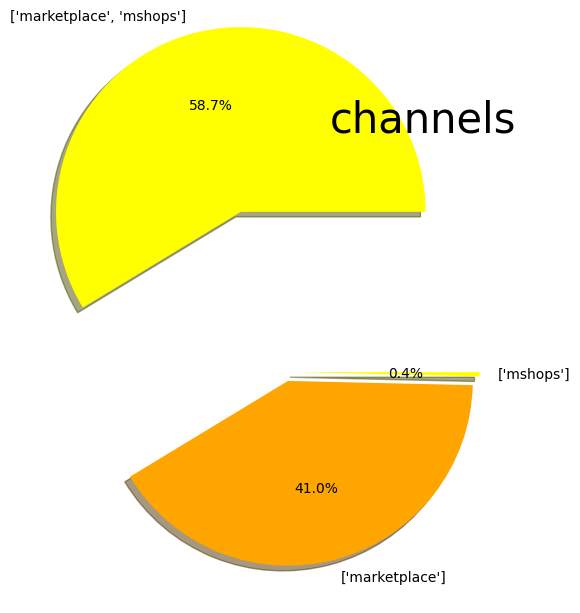

In [55]:
# Visualización de canales
plt.figure(figsize=(10,6))
myexplode =[0.9, 0.05, 0.05]
mycolors = ['yellow', 'orange']
plt.pie(list(df['channels'].value_counts().head()), labels=list(df['channels'].value_counts().head().
                                                                keys()), autopct='%0.1f%%', explode = myexplode, shadow= True, colors=mycolors)
plt.title('channels', fontsize=30, loc='right')
plt.show()

In [34]:
# Revisiones básicas condición del producto
df['condition'].value_counts(normalize=True)

new              0.784441
used             0.209887
not_specified    0.005673
Name: condition, dtype: float64

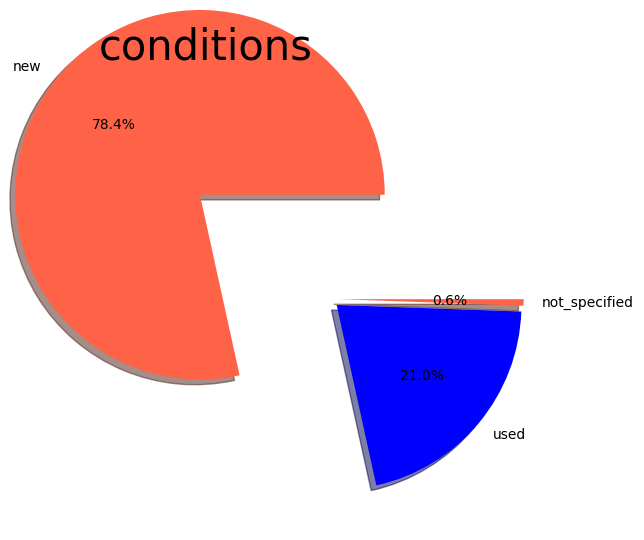

In [68]:
# Visualización de condiciones
plt.figure(figsize=(10,6))
myexplode =[0.9, 0.05, 0.05]
mycolors = ['#FF6347', 'blue']
plt.pie(list(df['condition'].value_counts().head()), labels=list(df['condition'].value_counts().head().
                                                                keys()), autopct='%0.1f%%', explode = myexplode, shadow= True, colors=mycolors)
plt.title('conditions', fontsize=30, loc='left')
plt.show()

In [36]:
# Revisiones básicas sellers
df['seller_address'].value_counts(normalize=True)

{'city': {'id': 'TUxBQ1FVSWI1MzY', 'name': 'Quilmes'}, 'state': {'id': 'AR-B', 'name': 'Buenos Aires'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'search_location': {'city': {'id': 'TUxBQ1FVSWI1MzY', 'name': 'Quilmes'}, 'state': {'id': 'TUxBUEdSQXJlMDNm', 'name': 'Bs.As. G.B.A. Sur'}}, 'id': 240407576}                                                                                           0.006479
{'city': {'id': 'QVItQkJlY2Nhcg', 'name': 'Beccar'}, 'state': {'id': 'AR-B', 'name': 'Buenos Aires'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'id': 1018610842}                                                                                                                                                                                                                                         0.003037
{'city': {'name': 'Béccar'}, 'state': {'id': 'AR-B', 'name': 'Buenos Aires'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'search_location': {'neighborhood': {'id': 'TUxBQkLJQzIzNTRa',

In [117]:
# Revisiones básicas participación de los dominios en el total: top de dominio
df['domain_id'].value_counts(normalize=True)

MLA-BOOKS                            0.064157
MLA-CARS_AND_VANS                    0.018215
MLA-MUSIC_ALBUMS                     0.015382
MLA-T_SHIRTS                         0.013965
MLA-SNEAKERS                         0.011941
                                       ...   
MLA-JUICES                           0.000202
MLA-WHEELCHAIRS                      0.000202
MLA-PORTION_MARKERS                  0.000202
MLA-KITCHEN_PANTRY_CABINETS          0.000202
MLA-MODEL_RAILROADING_ACCESSORIES    0.000202
Name: domain_id, Length: 1459, dtype: float64

In [38]:
# Revisiones básicas participación de los tags en el total
df['tags'].value_counts(normalize=True)

[good_quality_picture, good_quality_thumbnail, immediate_payment, cart_eligible]                                                         0.133023
[good_quality_picture, immediate_payment, cart_eligible]                                                                                 0.085442
[immediate_payment, cart_eligible]                                                                                                       0.061348
[good_quality_thumbnail, immediate_payment, cart_eligible]                                                                               0.037255
[poor_quality_picture, immediate_payment, cart_eligible]                                                                                 0.036040
                                                                                                                                           ...   
[moderation_penalty, poor_quality_thumbnail, immediate_payment, cart_eligible]                                              

In [39]:
# Revisiones básicas en precios
min(df.price), max(df.price)

(150.0, 133558420.0)

In [40]:
# Revisiones básicas en precios
df['price'].describe()

count    4.937000e+03
mean     1.464075e+05
std      2.103437e+06
min      1.500000e+02
25%      3.500000e+03
50%      9.999000e+03
75%      3.060000e+04
max      1.335584e+08
Name: price, dtype: float64

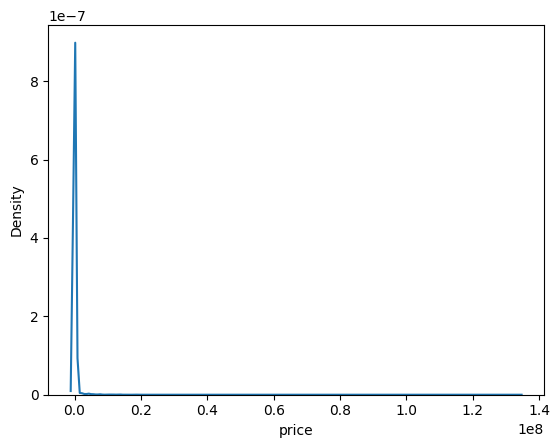

In [43]:
# Visalización de distribución de precios
sns.kdeplot(df['price'])
plt.show()

<Axes: >

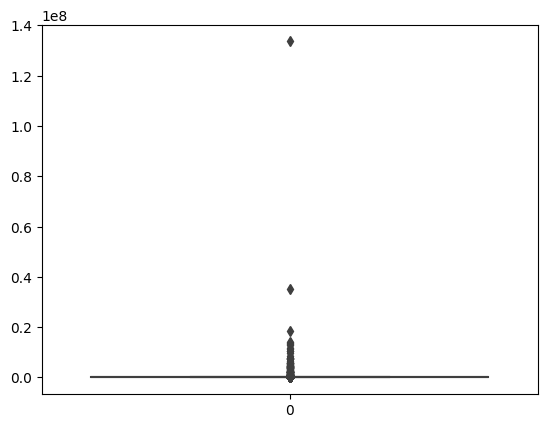

In [44]:
# Visualización comportamiento de precios
sns.boxplot(df['price'])

In [45]:
# Revisiones básicas sample item precio
df.sample()

,id,site_id,title,subtitle,seller_id,category_id,user_product_id,official_store_id,price,base_price,...,channels,bundle,date_created_year,date_created_month,date_created_week,date_created_day,last_updated_year,last_updated_month,last_updated_week,last_updated_day
MLA1134839463,MLA1134839463,MLA,Cd - Up All Night / Take Me Home (2 Cd) - One ...,None,186616505,MLA1174,None,838,6943.0,6943.0,...,"[marketplace, mshops]",None,2022,4,17,29,2023,5,20,16


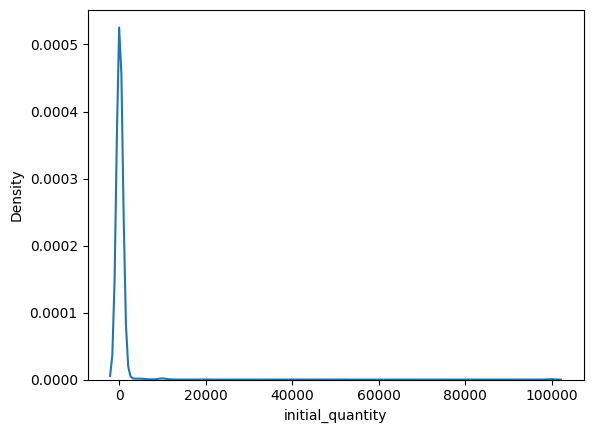

In [46]:
# Revisiones básicas initial quantity
sns.kdeplot(df['initial_quantity'])
plt.show()

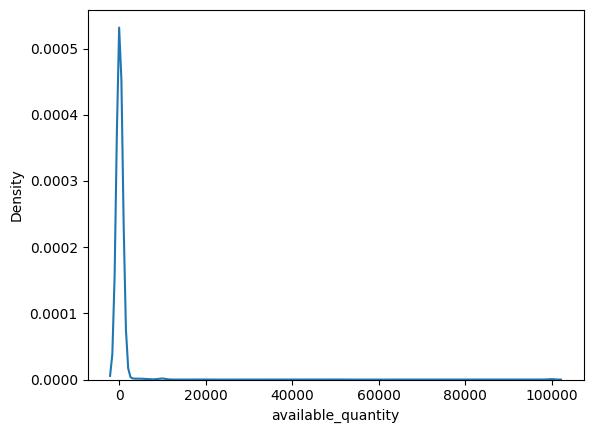

In [47]:
# Revisiones básicas available quantity
sns.kdeplot(df['available_quantity'])
plt.show()

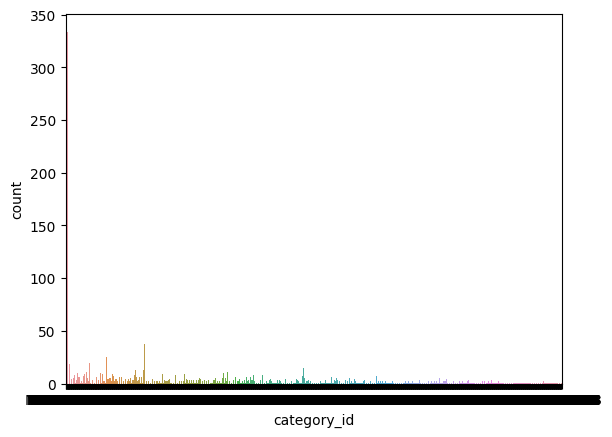

In [48]:
# Revisiones básicas por categoria_id
sns.countplot(x='category_id', data=df)
plt.show()

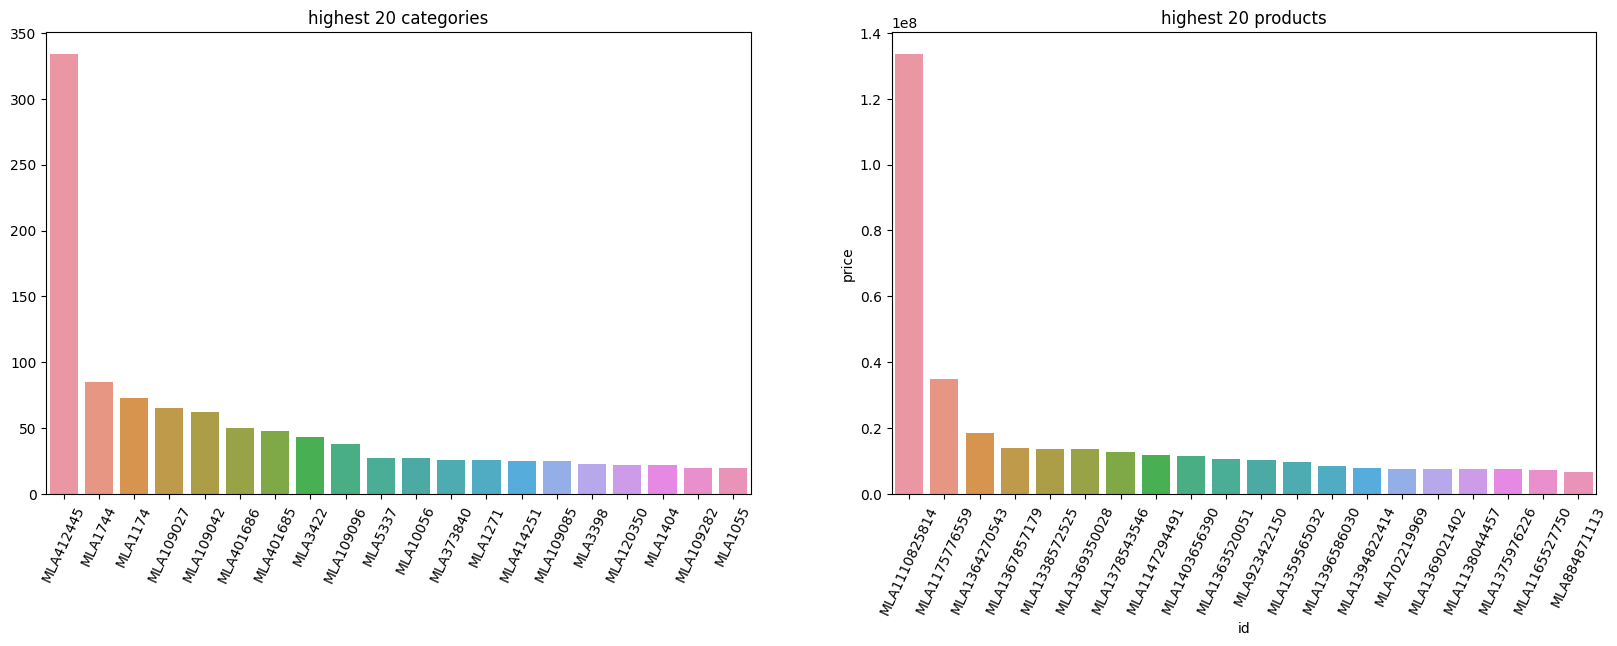

In [49]:
# Visualización top de categorias y precios
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

data = df['category_id'].value_counts().head(20)
plt.title('highest 20 categories')
sns.barplot(x=data.index, y=data.values)
plt.xticks(rotation= 65)

plt.subplot(1,2,2)
data = df.groupby('id')['price'].sum().sort_values(ascending=False).reset_index().head(20)
plt.title('highest 20 products')
plt.xticks(rotation= 65)
ax = sns.barplot(y='price', x='id', data=data, order=data['id'])

In [50]:
# Revisiones básicas descripción de items en la descripción de estos
df.title[0:10]

MLA1103583555    Alfileres Comunes Erizo Modista Telas 48 Unidades
MLA663244697             Tarima Antideslizante En Acero Inoxidable
MLA1381235270    Conjunto Bebe Jardinero Frisa Est.dinosaurios ...
MLA1330363504       Horno Electrico Daewoo Dw-3000e 30l Negro 220v
MLA1142429165                     Silla Tulum- Simil Yute O Pvc X8
MLA1349062170    Local Comercial Sobre Av. Edn, Centro La Falda...
MLA1382742900    Cronicas De Fronteras. Roberto Landaburu. C/nu...
MLA1362060713    Alargue Armado Ideal Corta Pasto Blanco 2x1,5 ...
MLA1159009297               Máquina Alza Cristal Peugeot 207 06/09
MLA896860341                                 Reloj Levis De Hombre
Name: title, dtype: object

In [56]:
# Stop words
#stopwords = nltk.corpus.stopwords.words('spanish')

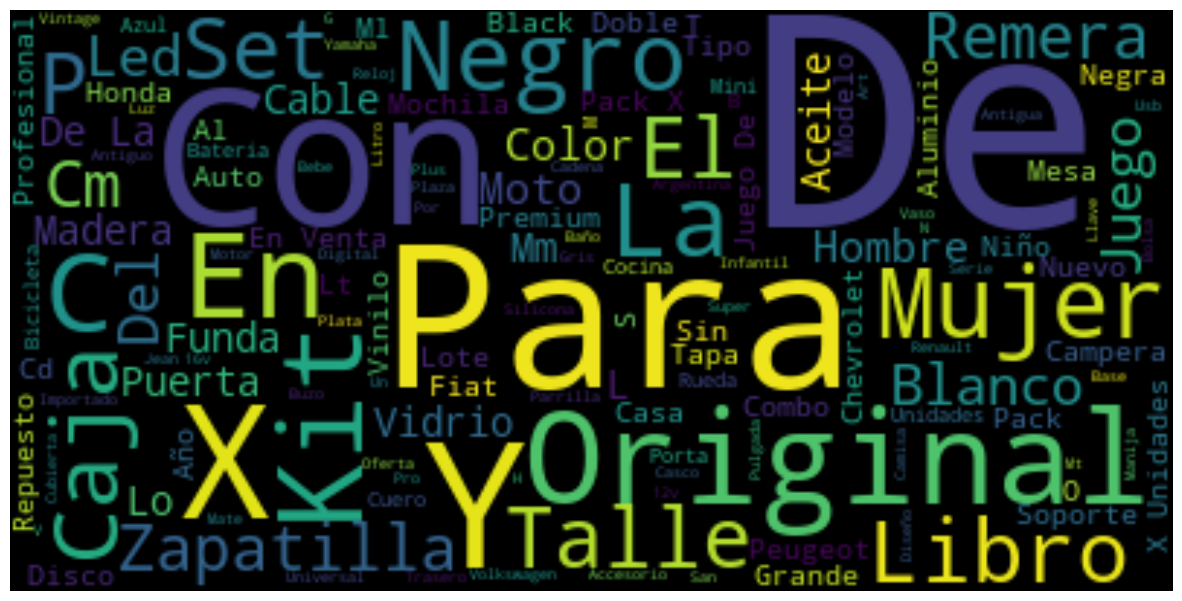

In [57]:
# Revisiones básicas descripciones de los items más usados
text = " ".join(i for i in df.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black').generate(text)


plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

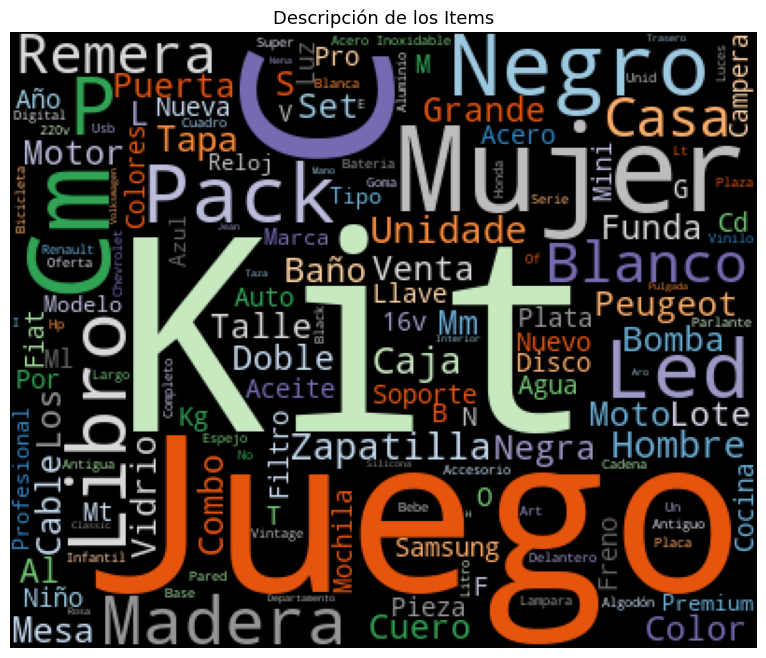

In [214]:
# Revisiones básicas descripciones de los items más usados

stopwords = ['de', 'par', 'en', 'x', 'X', 'y', 'con', 'Y',
               'A', 'Sin', 'La', 'Ay', 'para', 'el', 'lo', 'las', 'the', 'del', 'original']

text = " ".join(i for i in df.title)
def generate_basic_wordcloud(data, title):
    cloud = WordCloud(width=400,
                     height=330,
                     max_words=150,
                     colormap='tab20c',
                     stopwords=stopwords,
                     collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()
    
generate_basic_wordcloud(text, 'Descripción de los Items')

### B. Comentarios

La revisión de datos pretende revelar condiciones que presentan las variables en el dataset ids o items. Entre estas tenemos:

* En los canales resulta particular que el gran peso se lo lleve la combinación de marketplace y shops, en este caso, se busca exhibir el items por todos los medios posibles. 

* En materia de condiciones del items resalta los productos nuevos con más de 70%. Aunque, el mercado de usados presenta un poco más del 20%, lo que da cuenta que muchas personas cuentan con un canal para vender productos de segunda mano, dando oportunidad para crear mercado y recibir dinero por items que no usa o no necesitan.

* En lo que respeta a los productos más vendidos (domain_id) son libros y carros los que dominan la lista. 

* Se encuentra algunas particularidades como la heterogeneiad de precios que muestran los items del dataset, no es extraño para un marketplace en dónde puede confluir desde un sencillo lapicero hasta un auto.

* En la revisión de categorias se evidencia algunas que aglutinan muchos items. Si embargo, por la forma del gráfico en materia de cantidad de categorias, la gran mayoría aglutina pocos items. Se puede lanzar la hipotesís de que hay muchos productos que necesitan una revisión de categoría o quizas una forma distinta de agruparlos, quizas familias o una nueva categoría.

* Finalmente, las nubes de palabras sobre la varible title, esta ofrece una descripción del item. Se observa de forma bastante visual cuales son las palabras que más se repiten, estan resaltando palabras como: libro, kit juego, mujer, pack y características como: negro, madera, cuero.

## **5. Resultados y conclusiones de la estructura del dataset ids**

### **A. Supuestos iniciales**

A partir de algunas revisiones y charlas en el equipo fueron apareciendo algunos elementos o ideas acerca del set de datos. Estos elementos son un punto de partida para las revisiones y se van transformando en supuestos o ideas a confirmar con el dataset. 

* En primer lugar, el dataset se puede dividir en una serie de elementos que son tomados como identificadores (id´s) y algunos atributos que describen cualidades o condiciones de los items. 

* En segundo lugar, se tiene una estructura preliminar de la jerarquia del dataset, es decir, una serie de relaciones que van a determinar la relación jerárquica de los elementos que contiene el dataset.

- **Dataset**:
    - Identificadores
    - Descriptivos

- **Estructura jerárquica central**:

    - Dominio
    - Categorías
    - Productos
    - Items



### **B. Análisis de variables**

In [ ]:
# Revisemos con números el supuesto de la jerarquia

In [219]:
# Cantidad de dominios
len(df['domain_id'].unique())

1482

In [220]:
# cantidad de categorias
len(df['category_id'].unique())

1744

In [221]:
# cantidad productos
len(df['catalog_product_id'].unique())

874

In [222]:
# cantidad de items
len(df['id'].unique())

5000

En este punto, ya hay un detalle que deja dudas sobre la relación jerarquicas inicial. Revisemos agrupando el dataset con las variables claves para este caso:

In [223]:
# Revisiones de jerarquia en el dataset
catalogo = pd.DataFrame(df, columns=['domain_id', 'category_id', 'id', 'catalog_product_id' , 'parent_item_id'])
catalogo.head()


,domain_id,category_id,id,catalog_product_id,parent_item_id
MLA1265900277,MLA-FOLDER_AND_EXPANDING_FILE_FILLER_PAPERS,MLA105386,MLA1265900277,<NA>,<NA>
MLA1133411860,MLA-DRUM_PEDALS,MLA26945,MLA1133411860,<NA>,<NA>
MLA1385405624,MLA-SOUVENIRS,MLA10056,MLA1385405624,<NA>,<NA>
MLA1117192385,MLA-VEHICLE_STEREOS,MLA6867,MLA1117192385,<NA>,<NA>
MLA1295493695,MLA-PROJECTORS,MLA11889,MLA1295493695,MLA19463985,<NA>


In [224]:
# Revisión catalog_product_id
cat_prod = catalogo[catalogo['catalog_product_id'] != '<NA>']
cat_prod.head()

,domain_id,category_id,id,catalog_product_id,parent_item_id
MLA1295493695,MLA-PROJECTORS,MLA11889,MLA1295493695,MLA19463985,<NA>
MLA1259573613,MLA-ELECTRIC_GRILLS,MLA373611,MLA1259573613,MLA16947766,<NA>
MLA1318043967,MLA-BICYCLES,MLA6143,MLA1318043967,MLA14163746,<NA>
MLA856468975,MLA-BOOKS,MLA412445,MLA856468975,MLA21474838,<NA>
MLA882476432,MLA-PC_KEYBOARDS,MLA418448,MLA882476432,MLA21535860,<NA>


In [225]:
# Se muestra que los items que tiene catalog_productt_id son pocos, pues en la muestra hay 5000 items y solo 881 tiene esta variable, es decir 0.1762 de los items
cat_prod.shape


(881, 5)

In [226]:
# Revisión variable parent_item_id
cat_parent = catalogo[catalogo['parent_item_id'] != '<NA>']
cat_parent.head(20)

,domain_id,category_id,id,catalog_product_id,parent_item_id
MLA822309267,MLA-OTHER_PROPERTIES_FOR_SALE,MLA6396,MLA822309267,<NA>,MLA784837970
MLA1276980413,MLA-CELLPHONE_REPLACEMENT_SPEAKERS,MLA11860,MLA1276980413,<NA>,MLA1262108970
MLA1360004689,MLA-BICYCLES,MLA6143,MLA1360004689,<NA>,MLA1260393521
MLA736577203,MLA-MUSIC_ALBUMS,MLA1174,MLA736577203,<NA>,MLA689832992
MLA1169145176,MLA-HOUSES_FOR_VACATION_RENTAL,MLA50278,MLA1169145176,<NA>,MLA1103170770
MLA1256399654,MLA-OTHER_PROPERTIES_FOR_SALE,MLA6396,MLA1256399654,<NA>,MLA1179936780
MLA1366515383,MLA-DINING_CHAIRS,MLA1627,MLA1366515383,<NA>,MLA1385525204
MLA1138327293,MLA-DIECAST_VEHICLES,MLA3398,MLA1138327293,<NA>,MLA1128362411
MLA1357635823,MLA-INTERACTIVE_GAMING_FIGURES,MLA412632,MLA1357635823,<NA>,MLA1286404433
MLA645587299,MLA-AUTOMOTIVE_ALARMS,MLA86345,MLA645587299,<NA>,MLA612138845


In [227]:
# Se muestra que los items que tiene parent_item_id son pocos, pues en la muestra hay 5000 items y solo 373 tiene esta variable, es decir, son el 0.0746 de los items
cat_parent.shape

(373, 5)

Intentando dar otro mirada a las relaciones jeraquicas del dataset, se usara *group by* como una herramienta para agrupar las variables

In [113]:
ddominio = df.groupby(['domain_id'])['domain_id'].count()
ddominio

domain_id
MLA-3D_PRINTER_HOTENDS               2
MLA-3D_PRINTER_STL_FILES             3
MLA-ABRASIVE_SAWS                    1
MLA-ACOUSTIC_GUITARS                 4
MLA-ACOUSTIC_PANELS                  1
                                    ..
MLA-WRISTWATCHES                    23
MLA-WRISTWATCH_SCREEN_PROTECTORS     2
MLA-YARNS                            2
MLA-YERBA_MATE                       5
MLA-ZIPPERS                          2
Name: domain_id, Length: 1459, dtype: int64

In [230]:
ddominio_cat = df.groupby(['domain_id'])['category_id'].count()
ddominio_cat

domain_id
MLA-3D_PRINTER_FILAMENTS             1
MLA-3D_PRINTER_STL_FILES             2
MLA-ABRASIVE_SAWS                    1
MLA-ACOUSTIC_GUITARS                 4
MLA-ACTION_CAMERA_MOUNTS             1
                                    ..
MLA-WRISTWATCHES                    19
MLA-WRISTWATCH_SCREEN_PROTECTORS     3
MLA-XENON_KITS                       1
MLA-YARNS                            2
MLA-YOGA_MATS                        2
Name: category_id, Length: 1481, dtype: int64

In [233]:
cat_paren = df.groupby(['catalog_product_id', 'parent_item_id'])['id'].agg('count').reset_index()
cat_paren.head()


,catalog_product_id,parent_item_id,id
0,MLA10348786,MLA1118917539,1
1,MLA10458009,MLA1213577879,1
2,MLA12348485,MLA774870259,1
3,MLA12734651,MLA586365568,1
4,MLA12760797,MLA744975237,1


Nota: Resultados similares en las dos revisiones de las variables, se puede suponer que las jerarquias intermedias son difusas o poco claras. 

In [234]:
# Los atributos revelan características de los items. Por ahora no se va dar un análisis a mayor profundidad para revelar mayores detalles al respecto.

df['attributes'][0]

[{'id': 'BRAND',
  'name': 'Marca',
  'value_id': None,
  'value_name': 'Cuaderno Inteligente',
  'value_struct': None,
  'values': [{'id': None, 'name': 'Cuaderno Inteligente', 'struct': None}],
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_type': 'string'},
 {'id': 'GTIN',
  'name': 'Código universal de producto',
  'value_id': None,
  'value_name': '7895098728218',
  'value_struct': None,
  'values': [{'id': None, 'name': '7895098728218', 'struct': None}],
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_type': 'string'},
 {'id': 'HOLES_NUMBER',
  'name': 'Cantidad de agujeros',
  'value_id': None,
  'value_name': '8',
  'value_struct': None,
  'values': [{'id': None, 'name': '8', 'struct': None}],
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_type': 'number'},
 {'id': 'ITEM_CONDITION',
  'name': 'Condición del ítem',
  'value_id': '2230284',
  'value_name': 'Nuevo',
  'value_struct': None,


### **C. Comentarios**

* El supuesto de las división de las variables del dataset entre indicadores y atributos, se observa de forma clara. Se tiene variables que permiten identificar los items y otras que revelan las características (forma, color, peso, material, entre otros).

* El supuesto de la estructura jerarquica del dataset, se observa que la relación entre las jerarquias superiores $Dominio$ y $categoría$, es clara y fácil de observar en el dataset. Sin embargo, la jerarquía inferios es nebulosa y poco clara, no se evidencia una relación contundente entre $productos$ e $items$.

* En la revisión de las variables *catalog_product_id*, *parents_item_id* se confirma que la relación jerarquica del dataset en las jerarquias inferiores productos-items, se desdibuja o desvanece, muy pocos items guardar esta relación.

* Lo anterior es una oportunidad para crear una categoria o familia, que permita aglutinar productos que tienen características similares, pero difieren en algunas cualidades o condiciones.


****






****


## 6. Carga de datos dataset Product

In [7]:
with gzip.open('compressed_products_ids.txt.gz') as f:
    prod_ids_df = pd.read_csv(f, names=['id'])
prod_ids_df.head()

,id
0,MLA10001276
1,MLA10001339
2,MLA10001432
3,MLA10001436
4,MLA10001444


In [8]:
product_test = prod_ids_df.sample(5000).id.tolist()

In [9]:
product_test[:2]

['MLA21853170', 'MLA15185146']

In [10]:
products_metadata = list(get_products_from_api(product_test))

Retrieving 5000 products from API


In [11]:
products_metadata[2]

('MLA15185146',
 {'id': 'MLA15185146',
  'status': 'active',
  'sold_quantity': 0,
  'domain_id': 'MLA-BABY_FORMULAS',
  'permalink': 'https://www.mercadolibre.com.ar/leche-de-formula-en-polvo-abbott-similac-advance-en-lata-x-6-unidades-de-113kg-0-a-12-meses/p/MLA15185146',
  'name': 'Leche de fórmula en polvo Abbott Similac Advance en lata x 6 unidades de 1.13kg\xa0- 0  a 12 meses',
  'family_name': 'Abbott Similac Advance En polvo',
  'buy_box_winner': None,
  'buy_box_winner_price_range': None,
  'pickers': [{'picker_id': 'UNITS_PER_PACKAGE',
    'picker_name': 'Unidades por envase',
    'products': [{'product_id': 'MLA15204175',
      'picker_label': '1',
      'picture_id': '',
      'thumbnail': '',
      'tags': ['change-multiple-pickers', 'disabled', 'no-bids'],
      'permalink': 'https://www.mercadolibre.com.ar/leche-de-formula-en-polvo-abbott-similac-advance-en-lata-de-352g-0-a-12-meses/p/MLA15204175'},
     {'product_id': 'MLA15185145',
      'picker_label': '4',
      'pic

## 7. Procesamiento de datos

### A. Transformación de lista a diccionario

In [12]:
# Cambiar las condiciones del archivo de list a dict

my_product_list = dict(products_metadata)
print(my_product_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### B. Transformación a dataframe

In [13]:
# construir a dataframe 

dproduct= pd.DataFrame.from_dict(my_product_list)
dproduct = dproduct.T
dproduct.head()

,id,status,sold_quantity,domain_id,permalink,name,family_name,buy_box_winner,buy_box_winner_price_range,pickers,pictures,main_features,attributes,short_description,parent_id,children_ids,settings,buy_box_activation_date,authority_types,date_created
MLA21764031,MLA21764031,active,0,MLA-DINING_CHAIRS,https://www.mercadolibre.com.ar/silla-de-comed...,"Silla de comedor Movg Móveis Fame, estructura ...",Movg Móveis Fame,None,None,"[{'picker_id': 'CHAIR_STRUCTURE_COLOR', 'picke...","[{'id': '906041-MLA53809769670_022023', 'url':...",[{'text': 'Estructura de acero y polipropileno...,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'type': 'plaintext', 'content': 'Buenas charl...",MLA21763994,[],"{'listing_strategy': 'catalog_required', 'has_...",2023-02-28T18:43:47Z,[INTERNAL],2023-02-15T18:34:30Z
MLA21404252,MLA21404252,active,4,MLA-BOOKS,https://www.mercadolibre.com.ar/jinetes-los-td...,"Jinetes, Los Td","Jinetes, Los Td. Kessel Joseph. Destino",None,None,None,"[{'id': '782579-MLA42043582569_062020', 'url':...","[{'text': 'Género: Novela.', 'type': 'key_valu...","[{'id': 'BOOK_TITLE', 'name': 'Título del libr...","{'type': 'plaintext', 'content': ''}",None,[],"{'listing_strategy': 'open', 'has_rich_descrip...",2023-01-29T09:59:29Z,[COMMUNITY],2023-01-28T11:18:38Z
MLA15185146,MLA15185146,active,0,MLA-BABY_FORMULAS,https://www.mercadolibre.com.ar/leche-de-formu...,Leche de fórmula en polvo Abbott Similac Advan...,Abbott Similac Advance En polvo,None,None,"[{'picker_id': 'UNITS_PER_PACKAGE', 'picker_na...","[{'id': '797073-MLA40338079009_012020', 'url':...","[{'text': 'Tipo de envase: lata.', 'type': 'ke...","[{'id': 'MANUFACTURER', 'name': 'Fabricante', ...","{'type': 'plaintext', 'content': 'Similac te o...",MLA9155547,[],"{'listing_strategy': 'catalog_required', 'has_...",2021-11-02T05:11:19Z,[INTERNAL],2019-10-15T19:31:17Z
MLA21853170,MLA21853170,active,1,MLA-JUICES,https://www.mercadolibre.com.ar/pack-x-3-unid-...,Pack X 3 Unid Jugo Limonada 18 Gr Noel Jugos ...,Pack X 3 Unid Jugo Limonada 18 Gr Noel Jugos ...,"{'item_id': 'MLA1421809968', 'category_id': 'M...",None,None,"[{'id': '697491-MLA46941121805_082021', 'url':...","[{'text': 'Mantener temperatura ambiente.', 't...","[{'id': 'MANUAL_TITLE', 'name': 'Título manual...","{'type': 'plaintext', 'content': ''}",MLA21853167,[],"{'listing_strategy': 'catalog_required', 'has_...",2023-02-26T06:25:14Z,[COMMUNITY],2023-02-25T21:36:54Z
MLA6415135,MLA6415135,active,0,MLA-BICYCLES,https://www.mercadolibre.com.ar/mountain-bike-...,"Mountain bike GTSM1 Obstáculo 2.0 R29 17"" 24v ...",GTSM1 Obstáculo 2.0 Adultos,None,None,"[{'picker_id': 'COLOR', 'picker_name': 'Color'...","[{'id': '828666-MLA26797332688_022018', 'url':...",[{'text': 'Cuadro fabricado en aluminio que br...,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'type': 'plaintext', 'content': 'Con una tray...",MLA18559901,[],"{'listing_strategy': 'catalog_required', 'has_...",2023-02-16T18:41:36Z,[INTERNAL],2017-05-31T13:43:37Z


In [14]:
# Revisión de dtypes del dataframe
dproduct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, MLA21764031 to MLA9775167
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          5000 non-null   object
 1   status                      5000 non-null   object
 2   sold_quantity               5000 non-null   object
 3   domain_id                   5000 non-null   object
 4   permalink                   5000 non-null   object
 5   name                        5000 non-null   object
 6   family_name                 5000 non-null   object
 7   buy_box_winner              1536 non-null   object
 8   buy_box_winner_price_range  494 non-null    object
 9   pickers                     1850 non-null   object
 10  pictures                    5000 non-null   object
 11  main_features               4983 non-null   object
 12  attributes                  5000 non-null   object
 13  short_description           5000 non-

### C. Revisiones valores perdidos

In [15]:
# se evidencia algunas variables con n-valores perdidos. Pero particularmente nos interesa parent_id para este caso.

def missing(dt):
    dat_missing = dt.isnull().sum()
    return dat_missing

missing(dproduct)


id                               0
status                           0
sold_quantity                    0
domain_id                        0
permalink                        0
name                             0
family_name                      0
buy_box_winner                3464
buy_box_winner_price_range    4506
pickers                       3150
pictures                         0
main_features                   17
attributes                       0
short_description                0
parent_id                      850
children_ids                     0
settings                         0
buy_box_activation_date          0
authority_types                  0
date_created                     0
dtype: int64

### D. Casteos de datos

In [16]:
# Se transforman las variables para obtener formatos que nos ayuden a realizar análisis posteriores.
def casteos(dt):
    
    dt['children_ids'] = dt['children_ids'].astype('string')
    dt['parent_id'] = dt['parent_id'].astype('string')
    dt['id'] = dt['id'].astype('string')
    dt['sold_quantity'] = pd.to_numeric(dt['sold_quantity'], errors='coerce')
    #dt['date_created'] =  dt['date_created'].map(lambda x: datetime.strptime(str(x), "%Y-%m-%dT%H:%M:%S.%fZ"))
    #dt['buy_box_activation_date '] = dt['buy_box_activation_date '].map(lambda x: datetime.strptime(str(x), "%Y-%m-%dT%H:%M:%S.%fZ"))
    
    
    return dt



In [17]:
dproduct = casteos(dproduct)

In [18]:
# revisión dtypes del dataset
dproduct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, MLA21764031 to MLA9775167
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          5000 non-null   string
 1   status                      5000 non-null   object
 2   sold_quantity               5000 non-null   int64 
 3   domain_id                   5000 non-null   object
 4   permalink                   5000 non-null   object
 5   name                        5000 non-null   object
 6   family_name                 5000 non-null   object
 7   buy_box_winner              1536 non-null   object
 8   buy_box_winner_price_range  494 non-null    object
 9   pickers                     1850 non-null   object
 10  pictures                    5000 non-null   object
 11  main_features               4983 non-null   object
 12  attributes                  5000 non-null   object
 13  short_description           5000 non-

## 8. Resultados y conclusiones

### A. Análisis de variables

In [19]:
# Revisiones básicas participación de los dominios en el total: top de dominio. El resultado del primer lugar, es identico al brindado en el top de ids.
dproduct['domain_id'].value_counts(normalize=True)

domain_id
MLA-BOOKS                 0.2750
MLA-SNEAKERS              0.1444
MLA-CELLPHONES            0.0510
MLA-MUSIC_ALBUMS          0.0278
MLA-HEADPHONES            0.0102
                           ...  
MLA-ELECTRIC_AIR_PUMPS    0.0002
MLA-SOFT_DRINKS           0.0002
MLA-NIGHTSTANDS           0.0002
MLA-TRASH_BAGS            0.0002
MLA-TALCUMS               0.0002
Name: proportion, Length: 373, dtype: float64

In [20]:
# Cantidad de id
len(dproduct['id'].unique())

5000

In [21]:
# Cantidad de parent_id
len(dproduct['parent_id'].unique())

3742

In [22]:
# Cantidad de dominios
len(dproduct['children_ids'].unique())

1

Se evidencia una relación desvalanceada entre la cantidad de parent_id y children_ids

In [23]:
# Revisiones de jerarquia en el dataset
cata_product = pd.DataFrame(dproduct, columns=['id', 'parent_id', 'children_ids', 'pickers'])
cata_product.head()


,id,parent_id,children_ids,pickers
MLA21764031,MLA21764031,MLA21763994,[],"[{'picker_id': 'CHAIR_STRUCTURE_COLOR', 'picke..."
MLA21404252,MLA21404252,<NA>,[],None
MLA15185146,MLA15185146,MLA9155547,[],"[{'picker_id': 'UNITS_PER_PACKAGE', 'picker_na..."
MLA21853170,MLA21853170,MLA21853167,[],None
MLA6415135,MLA6415135,MLA18559901,[],"[{'picker_id': 'COLOR', 'picker_name': 'Color'..."


In [31]:
# Revisión variable parent_id
cata_parent_prod = cata_product[cata_product['parent_id'] != '<NA>']
cata_parent_prod.head(10)

,id,parent_id,children_ids
MLA18661399,MLA18661399,MLA16162318,[]
MLA18671299,MLA18671299,MLA18261201,[]
MLA17016073,MLA17016073,MLA17016007,[]
MLA18388172,MLA18388172,MLA9109070,[]
MLA6356732,MLA6356732,MLA12032576,[]
MLA18430509,MLA18430509,MLA6233623,[]
MLA20856988,MLA20856988,MLA19944456,[]
MLA20006790,MLA20006790,MLA20006698,[]
MLA10520204,MLA10520204,MLA10520203,[]
MLA21222511,MLA21222511,MLA21222491,[]


In [32]:
# Revisión de los produtos que tiene definido la categoria de parent_ids
cata_parent_prod.shape

(4114, 3)

In [34]:
# Revisión variable chindren_id. En este caso, no se evidencia la relación parent-children
cata_children_prod = cata_product[cata_product['children_ids'] != '<NA>']
cata_children_prod.head(10)

,id,parent_id,children_ids
MLA22421981,MLA22421981,<NA>,[]
MLA18661399,MLA18661399,MLA16162318,[]
MLA18671299,MLA18671299,MLA18261201,[]
MLA17016073,MLA17016073,MLA17016007,[]
MLA18388172,MLA18388172,MLA9109070,[]
MLA6356732,MLA6356732,MLA12032576,[]
MLA20025742,MLA20025742,<NA>,[]
MLA18430509,MLA18430509,MLA6233623,[]
MLA20856988,MLA20856988,MLA19944456,[]
MLA20006790,MLA20006790,MLA20006698,[]


In [35]:
# Desde otra mirada, no se observa de forma clara la relación parent-children
cata_children_prod = dproduct.groupby(['parent_id', 'children_ids'])['id'].agg('count').reset_index()
cata_children_prod .head()


,parent_id,children_ids,id
0,MLA10024874,[],1
1,MLA10038332,[],1
2,MLA10046213,[],1
3,MLA10078880,[],1
4,MLA10092851,[],1


## B. Comentarios

* Se evidencia en los datos revisados que las categorias parent_id y children_ids, no tiene una relación significativa en los datos revisados. Es decir, pocos productos tienen las dos variables con valores.

* Se observa la presencia de un fenomeno similar al dataset ids (items), esto debido a que no es evidencia una categoría o familia que defina los productos desde los rangos medios de jerarquia hacia abajo.

* En sintesis, la oportunidad de crear una categoría o familia que agrupe items y productos similares esta presente. Esto puede mejorar los procesos de distribución, ventas, clasificación de los productos vendidos en MeLi

## 9. Propuestas e ideas generales

* La revisión de los dos dataset ids y product deja la puerta abierta a proponer la creación de lo que pudiese denominar categoría nueva, que sirva para conectar la jerarquía de mayor nivel con los items o productos. 

* Se pueden considerar algunas técnicas de Machine Learning para realizar una series de agrupaciones o clasificaciones con el fin de enterder que productos pueden considerarse similares como para formar una categoría.

* Es sumamente importante considerar grafos como una técnica que puede brindar las respuestas que este reto requiere. En este caso, revisar dataset que tengan items y products es un paso obligado. Para luego, empezar a diseñar un grafo que aglutine o agrupe los items con caracteristicas similares, y con esto tener argumentos para crear las agrupaciones (categorías o familias).